<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

# TS5: Estimación espectral: Ancho de banda de señales reales 

**Alumnas:** María Victoria Poric y Agustina Rocío Paolini Rosso  
**Carrera:** Ingeniería Biomédica    
**Materia:** Análisis y Procesamiento de Señales    
**Fecha:** Octubre 2025 

## Consigna

Tomar del repositorio `PDStestbench` los siguientes tres tipos de señales registradas:

- Electrocardiograma (ECG): `ECG_TP4.mat` — Registro electrocardiográfico durante una prueba de esfuerzo.  
- Pletismografía (PPG): `PPG.csv` — Señal registrada en reposo.  
- Audio: Tres registros con voz y dos registros con silbidos.

1) Estimar la densidad espectral de potencia (PSD) de cada señal utilizando alguno de los métodos vistos en clase:
- Periodograma ventaneado  
- Welch  
- Blackman–Tukey

2) A partir de la PSD:
- Estimar el ancho de banda de cada señal.  
- Presentar los resultados en una tabla comparativa.

*Bonus*:
- Proponer y analizar una señal adicional, explicando su origen y cómo fue digitalizada. Repetir el análisis de PSD y ancho de banda.

## Introducción
El análisis espectral es una herramienta esencial en el procesamiento de señales, ya que permite estudiar cómo se distribuye la energía de una señal en el dominio de la frecuencia. En muchos casos, como en señales biomédicas o acústicas, la observación directa en el dominio temporal no es suficiente para comprender los fenómenos que intervienen en la generación de la señal. Por ejemplo, en un electrocardiograma (ECG) o una señal de pletismografía (PPG), los componentes de baja frecuencia están asociados a procesos fisiológicos lentos, mientras que las componentes de mayor frecuencia pueden corresponder a ruido o artefactos. En señales de audio, por otra parte, el contenido espectral define la calidad y las características tonales del sonido.

Para caracterizar cuantitativamente este contenido frecuencial se utiliza la Densidad Espectral de Potencia (Power Spectral Density, PSD), la cual describe cómo se distribuye la potencia de la señal en función de la frecuencia. En otras palabras, la PSD permite identificar qué frecuencias contienen mayor energía, ofreciendo una visión más profunda de la dinámica interna de la señal.

Matemáticamente, para una señal estacionaria $x(t)$ con transformada de Fourier $X(f)$, la PSD se define como:

$$
S_{xx}(f) = \lim_{T \to \infty} \frac{1}{T} \, E\left\{ \left| X_T(f) \right|^2 \right\} \tag{1}
$$

donde $X_T(f)$ es la transformada de Fourier de la señal truncada a un intervalo de duración $T$, y $E{⋅}$ denota el valor esperado. Sin embargo, en la práctica trabajamos con señales discretas y de duración finita, por lo que es necesario estimar la PSD a partir de los datos disponibles.

El **método de Welch** es una de las técnicas más utilizadas para estimar la PSD de manera robusta. Surge como una mejora del periodograma clásico, que aunque conceptualmente simple, presenta alta variabilidad en sus estimaciones. Welch propone reducir dicha varianza mediante un proceso de promediado:

1) *Segmentación*: la señal $x[n]$ se divide en varios segmentos solapados de longitud $L$.
   
2) *Ventaneo*: cada segmento se multiplica por una ventana (por ejemplo, Hamming o Hann) para minimizar las fugas espectrales causadas por la truncación.

3) *Cálculo del periodograma*: se obtiene la potencia espectral de cada segmento:
$$
P_k(f) = \frac{1}{L U} \left| \sum_{n=0}^{L-1} w[n] \, x_k[n] \, e^{-j 2 \pi f n} \right|^2 \tag{2}
$$
donde $w[n]$ es la ventana aplicada, $U$ un factor de normalización, y $x_k[n]$ es el segmento k-ésimo de la señal.  

4) *Promediado*: los periodogramas de todos los segmentos se promedian:
$$
S_{xx}(f) = \frac{1}{K} \sum_{k=1}^{K} P_k(f) \tag{3}
$$
obteniendo así una estimación más suave y confiable de la densidad espectral.

Este procedimiento mejora la estabilidad del resultado a costa de una ligera pérdida en la resolución en frecuencia, generando un equilibrio adecuado entre precisión y robustez.

El método de Welch resulta particularmente apropiado para señales fisiológicas y de audio, ya que estas suelen ser cuasi-estacionarias (su estadística cambia lentamente en el tiempo), y el promediado permite reducir los efectos del ruido y las variaciones transitorias. Es una técnica de estimación del espectro no paramétrica que es ampliamente utilizada. Su conveniencia para el análisis de señales como ECG (Electrocardiograma), PPG (Fotopletismografía) y señales de audio radica en su capacidad para proporcionar una estimación de la densidad espectral de potencia (PSD) que es a la vez asintóticamente insesgada y consistente.

Las señales como el ECG, PPG y el audio a menudo se consideran procesos aleatorios (estocásticos). El análisis espectral de estos sistemas probabilísticos requiere métodos que manejen eficazmente el ruido y la varianza.

El principal problema del periodograma simple (el estimador de PSD más básico) es que no es un estimador consistente. Esto significa que, incluso si la longitud de la secuencia de datos (N) se incrementa indefinidamente, la varianza del periodograma no se acerca a cero, manteniendo una gran dispersión en las estimaciones repetidas del proceso.
El método de Welch se utiliza precisamente para reducir la varianza. Esto se logra promediando múltiples mediciones de periodogramas, basándose en el principio de que promediar un conjunto de mediciones no correlacionadas de una variable aleatoria disminuye la varianza en proporción a la cantidad de mediciones promediadas (M).

Las señales de audio son inherentemente variables en el tiempo. Para analizar estas señales, se utiliza la Transformada de Fourier de Corto Tiempo (STFT), que divide la señal en una serie de subsecuencias más cortas (frames) donde se puede suponer que la frecuencia es aproximadamente constante.
Aunque el método de Welch es un método no paramétrico de estimación de PSD para señales aleatorias, el proceso que utiliza —segmentación y posterior promediado— es análogo al enfoque de framing utilizado en el STFT:
- Segmentación: Welch divide la secuencia de datos $x[n]$ en $M$ frames de longitud $L$. Esta técnica de análisis a corto plazo es crucial para el análisis de señales dinámicas, como el habla o señales fisiológicas como el ECG/PPG (las cuales pueden contener componentes estocásticos o cuasi-periódicos con cambios en sus características espectrales a lo largo del tiempo).
- Ventaneo (Windowing): El método de Welch multiplica cada frame por una función de ventana $\omega_L [n]$. Esto es esencial para mitigar la propagación espectral y la fuga espectral (spectral leakage) que resultan de la duración finita del segmento analizado. Para el audio, donde las amplitudes de los componentes espectrales pueden variar ampliamente, la elección de una ventana adecuada es vital para resolver componentes de baja amplitud.

Para señales médicas y de audio que contienen ruido, la necesidad de una estimación consistente y de baja varianza proporcionada por el método de Welch es fundamental para obtener resultados espectrales fiables, especialmente si el objetivo es identificar componentes de frecuencia de baja amplitud que de otro modo podrían confundirse con la variación del ruido de fondo o la fuga espectral.

El método de Welch es superior a los métodos que se basan en un único segmento largo de datos (como una implementación tradicional de Blackman-Tukey con una ventana larga) porque combina las ventajas de ambos dominios:
1. Consistencia y Baja Varianza: Al promediar múltiples segmentos, proporciona un resultado mucho más suave y menos ruidoso que un solo periodograma de la misma duración total.
2. Mitigación de Fuga Espectral: Utiliza una ventana de datos específica ($\omega_L[n]$) para cada segmento para controlar la fuga espectral.
3. Eficiencia en la Estimación (Solapamiento): El uso de solapamiento (típicamente del 50%) reduce aún más la varianza en comparación con el simple promediado de Bartlett (sin solapamiento), sin necesidad de recolección de datos adicionales.

Luego, a partir de la PSD estimada, es posible calcular el **ancho de banda efectivo** de cada señal, es decir, el rango de frecuencias donde se concentra la mayor parte de su energía. Este parámetro proporciona información relevante sobre la naturaleza de la señal y sobre los requisitos de muestreo y filtrado necesarios para su procesamiento.

Una forma común de estimarlo es identificar el intervalo de frecuencias $[f1,f2]$ que contiene un porcentaje significativo (por ejemplo, el 95%) de la potencia total:

$$
\int_{f_1}^{f_2} S_{xx}(f) \, df = 0.95 \int_{0}^{f_{\text{max}}} S_{xx}(f) \, df \tag{4}
$$

Comparar el ancho de banda entre señales de distinta naturaleza (ECG, PPG y audio) permite comprender sus diferencias fundamentales: mientras que las señales fisiológicas suelen concentrar su energía en frecuencias bajas, las señales acústicas presentan una distribución más amplia y rica en armónicos.

El objetivo principal de este trabajo es estimar y analizar la densidad espectral de potencia (PSD) de distintos tipos de señales, como la del electrocardiograma (ECG), pletismografía (PPG) y audio, utilizando el método de Welch como técnica de estimación. A partir de las PSD obtenidas, se busca determinar el ancho de banda característico de cada señal y comparar sus comportamientos espectrales, resaltando las diferencias entre señales fisiológicas y acústicas. De esta manera, el estudio permite no solo aplicar herramientas de procesamiento digital de señales vistas en clase, sino también interpretar los resultados desde un punto de vista práctico y fisiológico, comprendiendo cómo el contenido en frecuencia refleja las propiedades y el origen físico de cada señal.

---
## Análisis y desarrollo
En primer lugar, se cargaron tres tipos de señales:

- ECG (Electrocardiograma) con una frecuencia de muestreo de `fs = 1000 Hz`,

- PPG (Pletismografía) con una frecuencia de muestreo de `fs = 400 Hz`,

- Audio proveniente de un archivo .wav, del cual también se obtuvo automáticamente su frecuencia de muestreo.

In [5]:
import numpy as np
from scipy import signal as sig
import matplotlib.pyplot as plt
import scipy.io as sio

# =======================================================
# CONFIGURACIÓN Y LECTURA DE SEÑALES
# =======================================================
# --- ECG sin ruido ---
fs_ecg = 1000  # Hz
ecg_sin_ruido = np.load('ecg_sin_ruido.npy').flatten()

# --- PPG sin ruido ---
fs_ppg = 400  # Hz
ppg = np.load('ppg_sin_ruido.npy').flatten()

# --- Audio ---
fs_audio, wav_data = sio.wavfile.read('la cucaracha.wav')
wav_data = wav_data.astype(float)


Estas señales representan distintos dominios de aplicación: el ECG y la PPG corresponden a señales biomédicas, que contienen información sobre la actividad cardíaca y hemodinámica, respectivamente. El análisis espectral en estos casos permite identificar las frecuencias dominantes asociadas a los ritmos fisiológicos (por ejemplo, la frecuencia cardíaca y sus armónicos), así como discriminar posibles ruidos.

En el caso de la señal de audio, el análisis de la densidad espectral de potencia (PSD) es especialmente útil para caracterizar el contenido armónico y tonal, ya que la energía de la señal se distribuye principalmente en bandas de frecuencia que corresponden a los fonemas, la melodía y el timbre. 

Contar con la frecuencia de muestreo de cada señal es fundamental para realizar un análisis espectral correcto, ya que esta determina el rango máximo de frecuencias representables (según el teorema de Nyquist).

Luego, se definió la función para obtener la estimación de la PSD y el ancho de banda de cada señal:

In [6]:
# =======================================================
# FUNCIÓN GENERAL DE PSD Y ANCHO DE BANDA
# =======================================================
def calcular_psd_y_bw(signal, fs, n_promedios, nfft_factor, color, nombre, fmax=None, mostrar_min=False):

    nperseg = signal.shape[0] // n_promedios
    nfft = nfft_factor * nperseg

    f, Pxx = sig.welch(signal, fs=fs, window='hamming', nperseg=nperseg, nfft=nfft)
    
    df = f[1] - f[0]
    pot_total = np.sum(Pxx) * df
    pot_acumulada = np.cumsum(Pxx) * df

    # índices del 1% y 99% de energía acumulada
    indice_99 = np.where(pot_acumulada >= 0.99 * pot_total)[0][0]
    bw_max = f[indice_99]

    if mostrar_min:
        indice_01 = np.where(pot_acumulada >= 0.01 * pot_total)[0][0]
        bw_min = f[indice_01]
    else:
        bw_min = None

    # Gráfico PSD
    plt.figure()
    plt.plot(f, Pxx, color=color)
    if mostrar_min:
        plt.axvline(bw_min, color=color, linestyle='--', alpha=0.6)
        plt.axvline(bw_max, color=color, linestyle='--', alpha=0.6,
                    label=f'BW = {bw_max - bw_min:.1f} Hz')
    else:
        plt.axvline(bw_max, color=color, linestyle='--',
                    label=f'BW = {bw_max:.2f} Hz')

    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Densidad espectral')
    plt.title(f'Densidad espectral de potencia - {nombre}')
    plt.grid(True)
    if fmax:
        plt.xlim(0, fmax)
    plt.legend()
    plt.tight_layout()
    plt.show()

    if mostrar_min:
        return bw_min, bw_max, bw_max - bw_min
    else:
        return bw_max

El objetivo de la función `calcular_psd_y_bw` es calcular la densidad espectral de potencia (PSD) de una señal mediante el método de Welch, estimar su ancho de banda que contiene el 99 % de la potencia, y graficar la PSD con las frecuencias límites destacadas.

En primer lugar, se determina `nperseg` que corresponde a la longitud de cada segmento para Welch. Al utilizar `signal.shape[0]//n_promedios`, se divide la señal en *n_promedios* bloques, lo que permite promediar periodogramas y reducir la varianza de la estimación. Luego, se calcula `nfft` que establece el número de puntos de la FFT. Si `nfft > nperseg`, se realiza zero-padding, lo que incrementa la resolución en frecuencia sin añadir nueva información. 

A continuación, se calcula la PSD mediante `sig.welch`, donde `f` contiene las frecuencias correspondientes a cada bin de la PSD, y `Pxx` es la densidad espectral estimada.

Se utiliza la ventana Hamming para minimizar la fuga espectral, ya que la señal es truncada por segmentos. Para señales biológicas (ECG, PPG) o acústicas (audio), a menudo se requiere un alto rango dinámico para distinguir los picos relevantes del ruido o de otras componentes fuertes.
La fuga espectral producida por un tono dominante (una componente fuerte, por ejemplo, el ruido de línea en ECG o el componente de baja frecuencia en PPG, o la frecuencia fundamental en audio) crea un "piso de ruido" efectivo. Si el pico del lóbulo lateral es alto, el ruido de fuga puede enmascarar otras componentes.

En el caso de la ventana elegida, al minimizar el pico máximo del lóbulo lateral (logrando una atenuación de ≈−43 dB), la ventana Hamming reduce la interferencia máxima que un pico fuerte ejerce sobre las frecuencias vecinas. Esto es crucial cuando se analizan señales compuestas donde los componentes espectrales difieren significativamente en amplitud.
Y, por ejemplo, aunque la ventana Hann tiene un decaimiento de lóbulos laterales más rápido (≈−18 dB/octave), su pico máximo de lóbulo lateral es más alto que el de Hamming (≈−32 dB). En el caso de una componente fuerte, el valor pico de la fuga (aunque localizada cerca del componente fuerte) es lo que determina el piso de ruido y la capacidad de discernir un componente débil.

La elección de Hamming está justificada en la estimación de PSD para estas señales porque prioriza la atenuación del pico máximo del lóbulo lateral, lo que se traduce en una mejor resolución de amplitud y minimiza la posibilidad de que una componente dominante en las señales ECG, PPG o de audio enmascare componentes de interés más débiles debido a la fuga espectral. 

A continuación, se calcula el ancho de cada bin en Hz denotado como *df*. 

Mediante una aproximación discreta de la integral de la PSD se calcula la potencia total aproximada:

$$
\text{pot\_total} \approx \int_0^{f_\text{max}} S_{xx}(f) \, df \approx \sum_{i} P_{xx}[i] \, \Delta f
$$

Y, además, se obtiene la potencia acumulada por frecuencia que es aproximadamente la energía total desde `0` hasta `f[i]`, es decir, el acumulado discreto de la PSD.

$$
\text{pot\_acumulada}[i] \approx \int_0^{f[i]} S_{xx}(f) \, df \approx \sum_{j=0}^{i} P_{xx}[j] \, \Delta f
$$

Para determinar el ancho de banda efectivo, se identifica la frecuencia donde se alcanza el 99 % de la potencia acumulada. Este valor se utiliza porque permite capturar prácticamente toda la energía de la señal sin verse afectada por componentes de muy baja energía o ruido de fondo que podrían alargar indefinidamente el rango de frecuencias. En otras palabras, el 99 % representa un criterio práctico que incluye la mayor parte de la información significativa de la señal, descartando contribuciones insignificantes. Opcionalmente, si `mostrar_min = True`, también se calcula el ancho de banda inferior correspondiente al 1 % de la potencia. El ancho de banda efectivo de la señal se define como:

$$
\text{BW} = f_\text{max\_potencia} - f_\text{min\_potencia}
$$
donde $f_\text{max\_potencia}$ corresponde a la frecuencia donde se alcanza el 99% de la potencia acumulada, y $f_\text{min\_potencia}$ corresponde al 1% si se considera el límite inferior.

Finalmente, la función grafica la PSD de la señal, mostrando el ancho de banda con líneas verticales punteadas y etiquetando su valor. Esta visualización permite interpretar qué rangos de frecuencia concentran la mayor parte de la energía de la señal, información fundamental tanto para señales biomédicas como para audio.

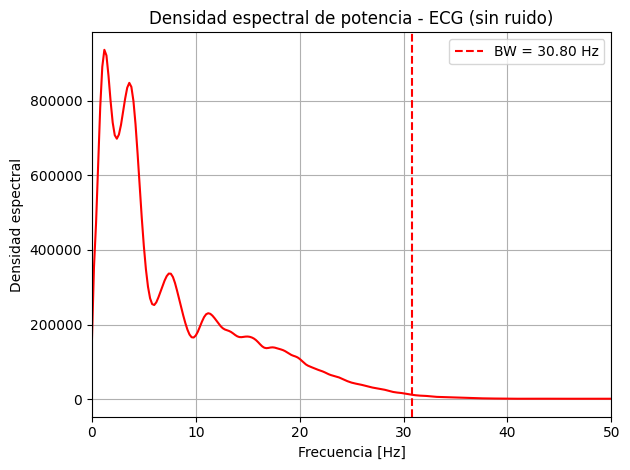

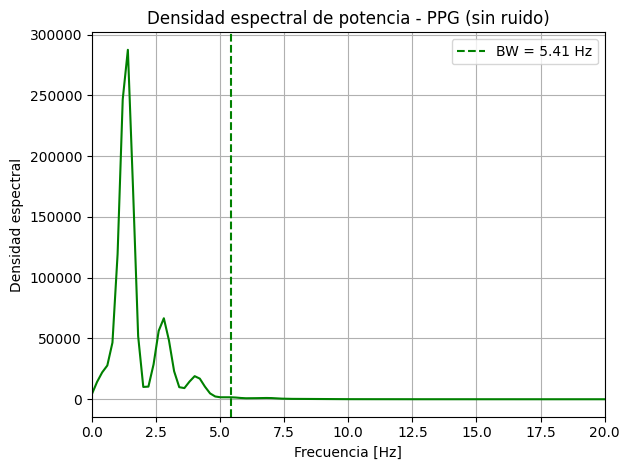

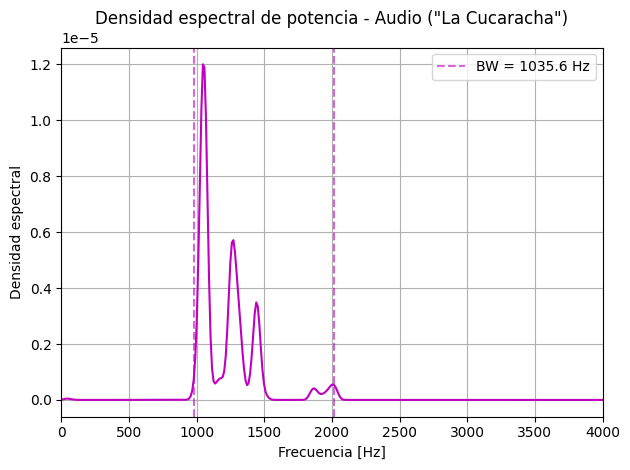


========== RESULTADOS FINALES ==========
Señal                               Ancho de Banda [Hz]
------------------------------------------------------------
ECG (sin ruido)                              30.80
PPG (sin ruido)                               5.41
Audio (voz)                                1035.65 (de 979.4 a 2015.0)
------------------------------------------------------------


In [7]:
# =======================================================
# CÁLCULO DE PSD Y ANCHOS DE BANDA
# =======================================================

# --- ECG sin ruido ---
bw_ecg_sin = calcular_psd_y_bw(ecg_sin_ruido, fs_ecg, n_promedios=30, nfft_factor=5,
                               color='r', nombre='ECG (sin ruido)', fmax=50)

# --- PPG sin ruido ---
bw_ppg = calcular_psd_y_bw(ppg, fs_ppg, n_promedios=45, nfft_factor=2,
                           color='g', nombre='PPG (sin ruido)', fmax=20)

# --- Audio (con ancho mínimo y máximo) ---
bw_audio_min, bw_audio_max, bw_audio_total = calcular_psd_y_bw(
    wav_data, fs_audio, n_promedios=135, nfft_factor=4,
    color='m', nombre='Audio ("La Cucaracha")', fmax=4000, mostrar_min=True
)

# =======================================================
# TABLA FINAL DE RESULTADOS
# =======================================================
print("\n========== RESULTADOS FINALES ==========")
print(f"{'Señal':<30}{'Ancho de Banda [Hz]':>25}")
print("------------------------------------------------------------")
print(f"{'ECG (sin ruido)':<30}{bw_ecg_sin:>20.2f}")
print(f"{'PPG (sin ruido)':<30}{bw_ppg:>20.2f}")
print(f"{'Audio (voz)':<30}{bw_audio_total:>20.2f} (de {bw_audio_min:.1f} a {bw_audio_max:.1f})")
print("------------------------------------------------------------")

Se realizó el cálculo de la PSD y del ancho de banda para cada señal utilizando la función `calcular_psd_y_bw` definida previamente.

En el caso del ECG se tomaron 30 promedios (`n_promedios = 30`) ya que un número menor generaba una PSD con más variabilidad, es decir, mayor ruido, mientras que un número mayor suavizaba demasiado la estimación. Se limita el `eje x` a 50 Hz ya que más allá de eso, el ECG no tiene contenido espectral relevante y se utiliza un factor de FFT de 5 (nfft_factor = 5) para obtener una resolución en frecuencia más fina, sin alterar la información real de la señal. El ECG es una señal muy lenta así que su ancho de banda suele estar entre 0 y 30 Hz. 

Para el caso del PPG se utilizan 45 promedios, una cantidad ligeramente mayor ya que la señal (flujo sanguíneo óptico) suele ser más suave y más corta. El factor de la FFT se reduce a 2, ya que la resolución en frecuencia no necesita ser tan alta y el contenido útil se encuentra en frecuencias bajas, por debajo de 20 Hz. 

Por último, para el caso de la señal de audio "La Cucaracha" el cálculo se realiza considerando tanto el límite inferior como el superior del ancho de banda (`mostrar_min = True`). Se divide la señal en 135 segmentos y se aplica un factor de FFT de 4 para obtener mayor resolución. Luego, se calcula la PSD con el método de Welch, y se determina la potencia total y la potencia acumulada, identificando las frecuencias donde se alcanza el 1% y el 99% de la potencia total. Este rango define el ancho de banda efectivo de la señal, que refleja prácticamente toda la energía significativa de la misma. Se limita el `eje x` entre 0 y 4000 Hz, abarcando el rango audible relevante del audio. 

En los gráficos es posible observar que el ECG tiene la mayor parte de su energía concentrada por debajo de 30 Hz, y la línea punteada marca el ancho de banda donde se acumula el 99% de la potencia. En la tabla, esta señal presenta un ancho de banda de aproximadamente `31 Hz`, concentrando su energía en bajas frecuencias. Esto es consistente con la fisiología cardíaca: la señal está dominada por los ritmos cardíacos y sus armónicos, que se encuentran principalmente por debajo de 30 Hz.

La señal de PPG presenta en su gráfico picos espectrales muy concentrados entre 0 y 6 Hz, lo que confirma la naturaleza lenta y suave del flujo sanguíneo. En la tabla tiene un ancho de banda muy reducido (aproximadamente `5 Hz`), ya que el flujo sanguíneo medido ópticamente cambia lentamente y contiene principalmente información de baja frecuencia.

Finalmente, en el gráfico de la señal de audio se puede ver cómo la energía se distribuye en varias bandas, reflejando los armónicos de la melodía. Las líneas punteadas muestran los límites inferior y superior del ancho de banda que contiene el 99% de la potencia. En la tabla es posible ver que esta señal ocupa un rango mucho mayor (alrededor de `1035 Hz`), reflejando la diversidad armónica y tonal de la música. Al considerar el 1 % y 99 % de la potencia acumulada, se obtiene un rango efectivo entre 979 y 2015 Hz, capturando la mayor parte de la energía significativa del audio.

---
## Bonus
Como análisis complementario, se calculó la densidad espectral de potencia y el ancho de banda de la señal de ECG original con ruido. Esto permite observar cómo la presencia de interferencias modifica la distribución espectral de la señal.

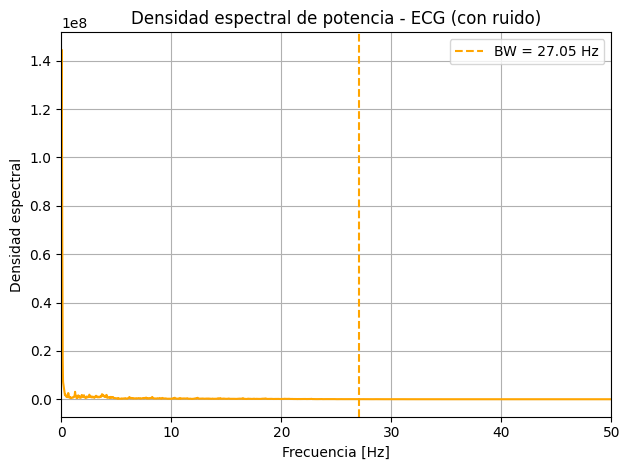


========== RESULTADOS FINALES ==========
Señal                               Ancho de Banda [Hz]
------------------------------------------------------------
ECG (con ruido) [BONUS]                      27.05
------------------------------------------------------------


In [8]:
# --- ECG con ruido (BONUS) ---
mat_struct = sio.loadmat('ECG_TP4.mat')
ecg_con_ruido = mat_struct['ecg_lead'].flatten()

# --- BONUS: ECG con ruido ---
bw_ecg_con = calcular_psd_y_bw(ecg_con_ruido, fs_ecg, n_promedios=30, nfft_factor=5, color='orange', nombre='ECG (con ruido)', fmax=50)

print("\n========== RESULTADOS FINALES ==========")
print(f"{'Señal':<30}{'Ancho de Banda [Hz]':>25}")
print("------------------------------------------------------------")
print(f"{'ECG (con ruido) [BONUS]':<30}{bw_ecg_con:>20.2f}")
print("------------------------------------------------------------")

En la figura anterior se puede ver que la PSD presenta un nivel de potencia mucho más alto en todo el espectro en comparación con la señal de ECG sin ruido. Esto se debe a que el ruido, al tener un espectro típicamente más ancho y plano, eleva la densidad espectral en frecuencias que originalmente tenían muy poca energía.

A pesar de esto, el ancho de banda estimado (`27.05 Hz`) no se incrementa drásticamente respecto al ECG limpio (`30.8 Hz`). Esto ocurre porque el criterio de ancho de banda basado en el 99 % de la potencia acumulada es robusto frente a pequeñas contribuciones de ruido en frecuencias altas: la mayoría de la energía útil del ECG sigue concentrada en bajas frecuencias (0–30 Hz), y la energía del ruido en frecuencias más altas no llega a desplazar de forma significativa el punto donde se acumula el 99 % de la potencia.

Si el ruido hubiera tenido una potencia comparable a la señal en todo el espectro, el ancho de banda estimado podría haberse desplazado hacia frecuencias mayores, mostrando la importancia de preprocesar las señales (por ejemplo, con filtrado) antes de aplicar este tipo de análisis.

Este resultado ilustra una ventaja del método de Welch y del criterio energético acumulado: incluso en presencia de ruido, permite obtener una estimación razonablemente estable del ancho de banda efectivo de la señal fisiológica.

## Conclusión
En este trabajo se aplicó el método de Welch para estimar la densidad espectral de potencia (PSD) de diferentes tipos de señales: biomédicas (ECG y PPG) y acústicas (audio), además de analizar el efecto del ruido sobre el ECG. Esta metodología permitió no solo visualizar la distribución de energía en el dominio frecuencial, sino también cuantificar el ancho de banda efectivo de cada señal mediante un criterio basado en el 99 % de la potencia acumulada. 

Los resultados obtenidos muestran diferencias claras entre las señales: el ECG presentó un ancho de banda reducido (aproximadamente 30 Hz), con su energía concentrada en bajas frecuencias, lo que concuerda con la naturaleza fisiológica de la actividad cardíaca. La PPG mostró un ancho de banda aún más estrecho (alrededor de 5 Hz), reflejando la suavidad de la señal asociada al pulso sanguíneo. La señal de audio evidenció un ancho de banda significativamente mayor (aproximadamente 1035 Hz), propio de señales complejas ricas en armónicos. Finalmente, el análisis del ECG con ruido demostró que, aunque el nivel espectral aumenta en todo el rango de frecuencias, el ancho de banda estimado se mantiene relativamente estable, evidenciando la robustez del método de Welch frente a perturbaciones moderadas.

En síntesis, la estimación de la PSD mediante Welch es una herramienta poderosa para caracterizar señales en el dominio de la frecuencia, ya que permite obtener información relevante sobre su contenido espectral de manera eficiente y con menor sensibilidad al ruido. Además, el cálculo del ancho de banda basado en potencia acumulada ofrece un criterio objetivo y consistente para comparar distintos tipos de señales.

Este enfoque es ampliamente aplicable en contextos biomédicos, acústicos y de ingeniería en general, facilitando tanto el análisis como el diseño de sistemas de adquisición y procesamiento de señales.

## Autoevaluación del aprendizaje
A lo largo de este trabajo, logramos consolidar y aplicar varios conceptos fundamentales del análisis de señales en el dominio de la frecuencia. Comprendimos en profundidad cómo funciona el método de Welch para estimar la densidad espectral de potencia y cómo la segmentación, el solapamiento y la ventana elegida influyen directamente en la resolución y suavizado del espectro.

Creemos haber alcanzado un buen entendimiento de los conceptos abordados, lo que nos permitió no solo implementar el código, sino también interpretar los resultados obtenidos. Las clases resultaron de gran utilidad, ya que nos brindaron las bases necesarias para poder avanzar en la práctica y elaborar el código. 

El trabajo lo realizamos de manera conjunta, pudimos juntarnos para ponernos de acuerdo en el código y en la redacción del informe. Con el objetivo de profundizar en los contenidos teóricos recurrimos a la bibliografía recomendada (*Thomas Holton - Digital Signal Processing*). Utilizamos ChatGPT para emprolijar el código, reforzar los contenidos teóricos y corregir algún error que haya surgido, pero mayormente el trabajo fue realizado en clase.